In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

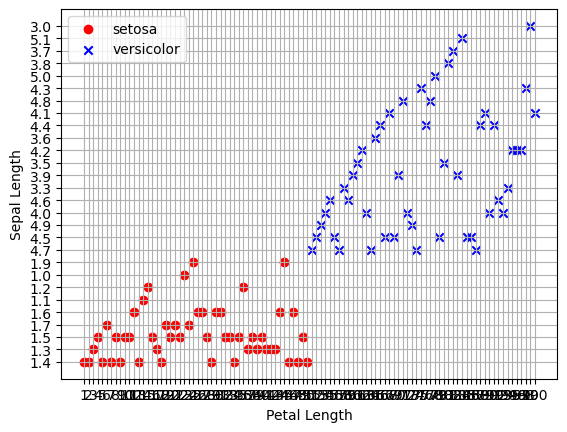

In [14]:
df = pd.read_csv('Iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [4]:
print(df.head())

    0              1             2              3             4            5
0  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1   1            5.1           3.5            1.4           0.2  Iris-setosa
2   2            4.9           3.0            1.4           0.2  Iris-setosa
3   3            4.7           3.2            1.3           0.2  Iris-setosa
4   4            4.6           3.1            1.5           0.2  Iris-setosa


In [5]:
# Menghilangkan baris pertama
df = df.iloc[1:].reset_index(drop=True)

# Menampilkan DataFrame setelah menghilangkan baris pertama
print(df.head())

   0    1    2    3    4            5
0  1  5.1  3.5  1.4  0.2  Iris-setosa
1  2  4.9  3.0  1.4  0.2  Iris-setosa
2  3  4.7  3.2  1.3  0.2  Iris-setosa
3  4  4.6  3.1  1.5  0.2  Iris-setosa
4  5  5.0  3.6  1.4  0.2  Iris-setosa


In [3]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1]) #digunakan untuk menambahkan bias, diantara input, atau data yang digunakan
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 4]].values # slice data latih
X = X.astype(float)

In [7]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [8]:
print(X)

[[5.1 0.2]
 [4.9 0.2]
 [4.7 0.2]
 [4.6 0.2]
 [5.  0.2]
 [5.4 0.4]
 [4.6 0.3]
 [5.  0.2]
 [4.4 0.2]
 [4.9 0.1]
 [5.4 0.2]
 [4.8 0.2]
 [4.8 0.1]
 [4.3 0.1]
 [5.8 0.2]
 [5.7 0.4]
 [5.4 0.4]
 [5.1 0.3]
 [5.7 0.3]
 [5.1 0.3]
 [5.4 0.2]
 [5.1 0.4]
 [4.6 0.2]
 [5.1 0.5]
 [4.8 0.2]
 [5.  0.2]
 [5.  0.4]
 [5.2 0.2]
 [5.2 0.2]
 [4.7 0.2]
 [4.8 0.2]
 [5.4 0.4]
 [5.2 0.1]
 [5.5 0.2]
 [4.9 0.1]
 [5.  0.2]
 [5.5 0.2]
 [4.9 0.1]
 [4.4 0.2]
 [5.1 0.2]
 [5.  0.3]
 [4.5 0.3]
 [4.4 0.2]
 [5.  0.6]
 [5.1 0.4]
 [4.8 0.3]
 [5.1 0.2]
 [4.6 0.2]
 [5.3 0.2]
 [5.  0.2]
 [7.  1.4]
 [6.4 1.5]
 [6.9 1.5]
 [5.5 1.3]
 [6.5 1.5]
 [5.7 1.3]
 [6.3 1.6]
 [4.9 1. ]
 [6.6 1.3]
 [5.2 1.4]
 [5.  1. ]
 [5.9 1.5]
 [6.  1. ]
 [6.1 1.4]
 [5.6 1.3]
 [6.7 1.4]
 [5.6 1.5]
 [5.8 1. ]
 [6.2 1.5]
 [5.6 1.1]
 [5.9 1.8]
 [6.1 1.3]
 [6.3 1.5]
 [6.1 1.2]
 [6.4 1.3]
 [6.6 1.4]
 [6.8 1.4]
 [6.7 1.7]
 [6.  1.5]
 [5.7 1. ]
 [5.5 1.1]
 [5.5 1. ]
 [5.8 1.2]
 [6.  1.6]
 [5.4 1.5]
 [6.  1.6]
 [6.7 1.5]
 [6.3 1.3]
 [5.6 1.3]
 [5.5 1.3]
 [5.5 1.2]

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

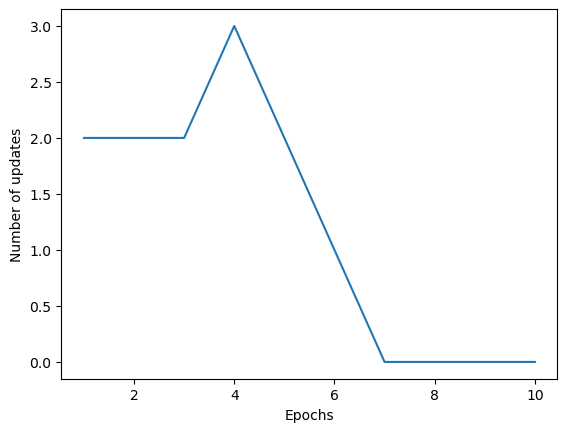

In [10]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [11]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, color=cmap(i), marker=markers[i], label=cl)

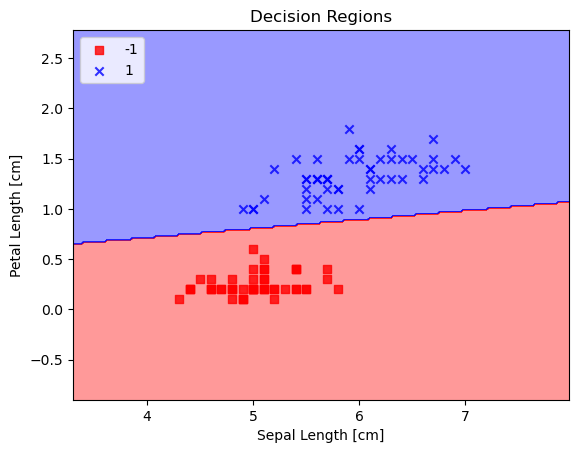

In [12]:
# Memanggil fungsi untuk menampilkan decision region
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.title('Decision Regions')
plt.legend(loc='upper left')
plt.show()